**Importing the required libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

**Setting the train and test set directories for reading the image**

In [ ]:
train_dir = "train\\train\\"
test_dir = "test_stg1\\test_stg1\\"

**Reading the classes from the trainig set folder**

In [ ]:
classes = sorted(os.listdir(train_dir))[0:]
print(classes)

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']


**Obtaining the labels for each of the trainig set images**

In [ ]:
# Get the labels

labels = []
for c in classes:
    l = [c]*len(os.listdir(train_dir+c+'\\'))
    labels.extend(l)

**Obtaining the image path last for the training data**

In [ ]:
# Get the training data paths

image_path_list = []
for c in classes:
    fish_images = [train_dir+c+'\\'+item for item in os.listdir(train_dir+c+'\\')]
    image_path_list.extend(fish_images)

**Reading the images from the training path**

In [ ]:
features = []
for i,image_path in enumerate(image_path_list):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    
    cv2.normalize(hist,hist)
    hist = hist.flatten()
    features.append(hist)
    if(i%1000==0):
        print(str(i)+ "  completed")

0  completed
1000  completed
2000  completed


**Importing the distance metric**

In [ ]:
from scipy.spatial import distance

**Computing the euclidean distance between each of the images**

In [ ]:
query = features[0]
distances  = []
for i in features[1:]:
    m = distance.euclidean(query,i)
    distances.append(m)

**Displaying the minimum distance value**

In [ ]:
min(distances)

0.03120770864188671

**Printing the index for the minimum distance value**

In [ ]:
index = distances.index(min(distances))
print(index)

170


**Reading the image stored at that particular index and displaying it**

In [ ]:
result= cv2.imread(image_path_list[index])

**Showing the query output and the result output**

Text(0.5, 0, 'BET')

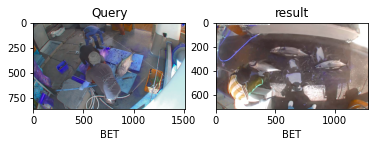

In [ ]:
fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(cv2.imread(image_path_list[0]))
plt.title("Query")
plt.xlabel(labels[0])
b = fig.add_subplot(1,2,2)
plt.imshow(result)
plt.title("result")
plt.xlabel(labels[index])

**An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.**


**Plotting an image histogram function to display the Query and Result**

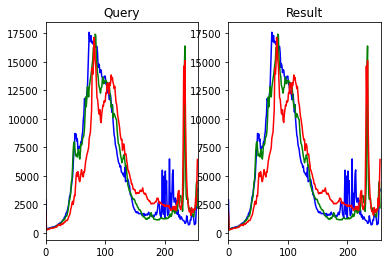

In [ ]:
img = cv2.imread(image_path_list[0])
fig = plt.figure()
a = fig.add_subplot(1,2,1)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Query")
img2 = cv2.imread(image_path_list[index])
b = fig.add_subplot(1,2,2)
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Result")

plt.show()

**Conclusion**

* We have calculated the euclidean distances for each of the image and have returned the most similar image based on the distance metric. The image histograms are almost similar as seen in the graph.

**License**

MIT License

Copyright (c) 2020 [ Prasham Shah, Priyanka Bandekar ] 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.